Find the leading scorer by zone on the court. Plot the zones and players' names.

In [1]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
from euroleague_api.shot_data import ShotData

sys.path.append("../utils/")
from draw_court import draw_court
from shot_chart_plots import plot_scatter, plot_scatter_single_df
# %matplotlib

plt.close("all")

In [2]:
shotdata = ShotData("E")
shot_df = shotdata.get_game_shot_data_single_season(2024)

Season 2024:   0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
def get_leading_scorer_by_zone(df):
    top_players_by_zone_df = df.groupby(["ZONE", "PLAYER"])["POINTS"].sum().reset_index()
    pidx = top_players_by_zone_df.groupby('ZONE')['POINTS'].idxmax()
    top_players = top_players_by_zone_df.loc[pidx]
    return top_players

In [4]:
def plot_leading_scorers_by_zone(shot_df, lead_scorers_df):
    plt.figure()
    draw_court()
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    for zone in lead_scorers_df.ZONE.unique():
        if zone not in [" ", "J"]:
            zone_df = shot_df[shot_df["ZONE"] == zone]
            y_annot = zone_df['COORD_Y'].median()
            if zone in ["B", "D", "F", "H"]:
                x_annot = zone_df['COORD_X'].median() - 150
            elif zone == "A":
                x_annot = -70
                y_annot = -70
            else:
                x_annot = zone_df['COORD_X'].median()
            player = lead_scorers_df.loc[lead_scorers_df["ZONE"] == zone, "PLAYER"].iloc[0]
            last, first = player.split(", ")
            player = f"{last} {first[:1]}."
            plt.annotate(player, (x_annot, y_annot), fontsize=8)
            plt.plot(zone_df['COORD_X'], zone_df['COORD_Y'], 'o', mfc='none', zorder=0)
    plt.show()
    return

In [5]:
top_players = get_leading_scorer_by_zone(shot_df)
top_players

ZONE             PLAYER  POINTS
48          LUCIC, VLADIMIR       7
109    A     JONES, TYRIQUE       8
141    B  BRAZDEIKIS, IGNAS      12
250    C       BLACK, TARIK       8
360    D        JAITEH, MAM       6
391    E   BALDWIN IV, WADE       4
464    F    NAPIER, SHABAZZ       6
482    G       BLATT, TAMIR       4
587    H   NEDOVIC, NEMANJA      12
632    I     BROOKS, ARMONI      12
733    J     RIVERO, JASIEL       0

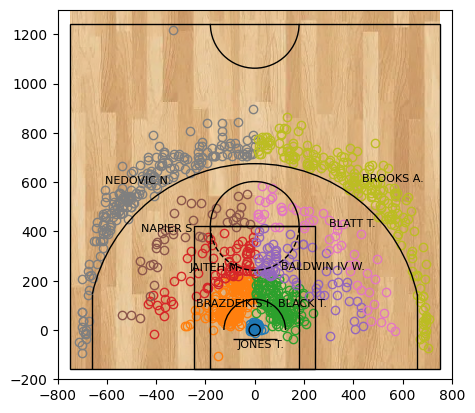

In [6]:
plot_leading_scorers_by_zone(shot_df, top_players)

# Player Shooting Chart

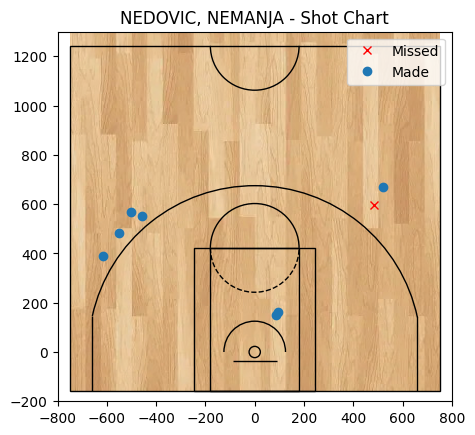

In [7]:
player_name = 'NEDOVIC, NEMANJA'
player_shot_df = shot_df[shot_df["PLAYER"] == player_name]
palyer_missed_mask = player_shot_df["ID_ACTION"].str.contains("FGA")
player_made_mask = player_shot_df["ID_ACTION"].str.contains("FGM")
plot_scatter(player_shot_df[player_made_mask], player_shot_df[palyer_missed_mask], title=f'{player_name} - Shot Chart', color="red")

# Teams' shooting chart

In [10]:
team_abbr = "PAN"
round_ = 1

In [13]:
team_shot_df = shot_df[(shot_df["TEAM"] == team_abbr) & (shot_df["Round"] == round_)]
team_missed_mask = team_shot_df["ID_ACTION"].str.contains("FGA")
team_made_mask = team_shot_df["ID_ACTION"].str.contains("FGM")
plot_scatter(team_shot_df[team_made_mask], team_shot_df[team_missed_mask], title=f'{team_abbr} - Shot Chart', color="red")

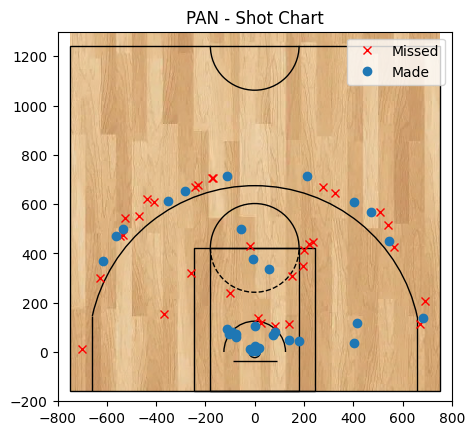

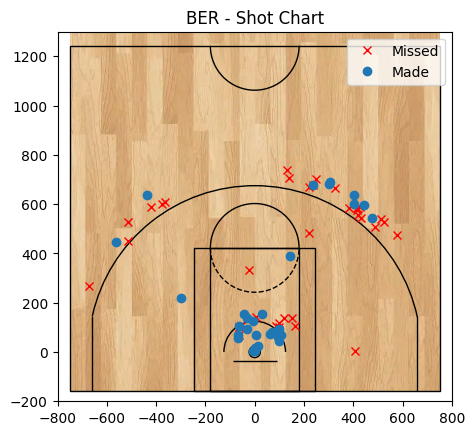

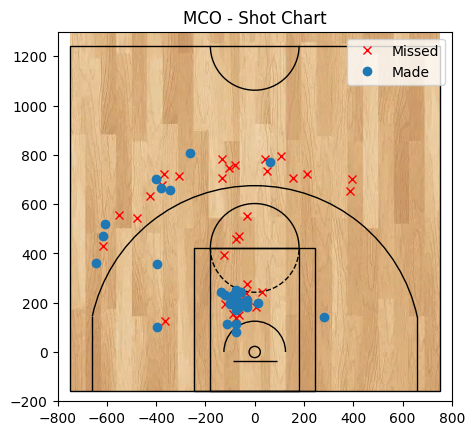

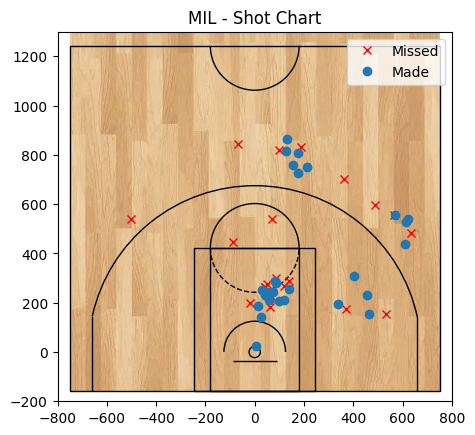

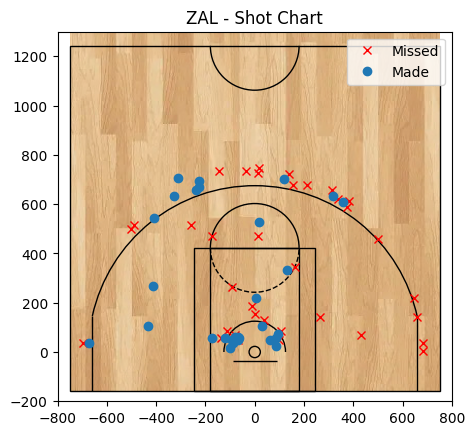

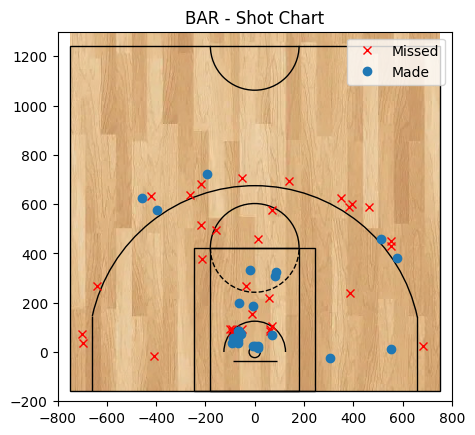

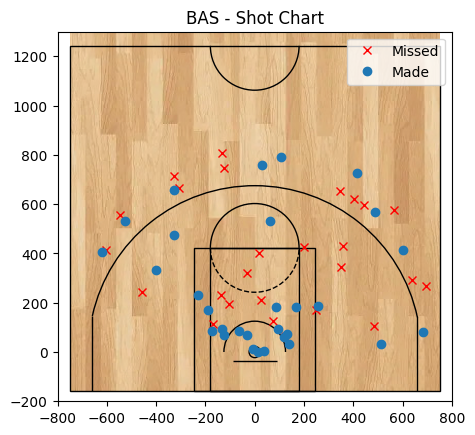

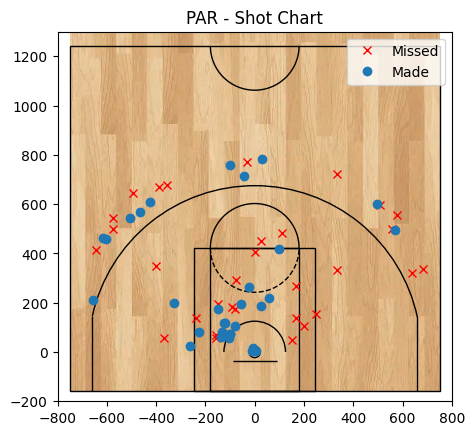

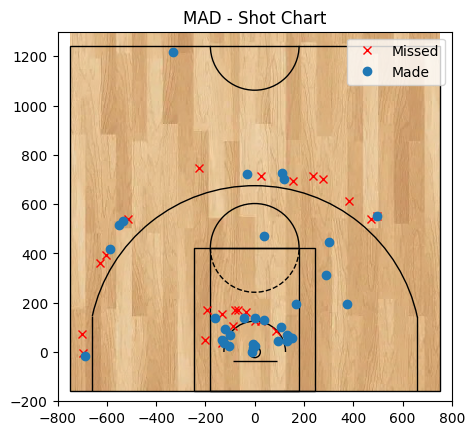

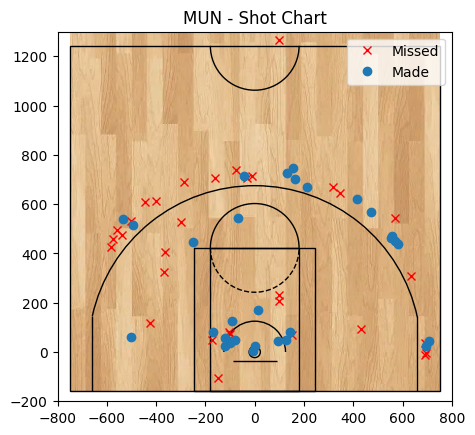

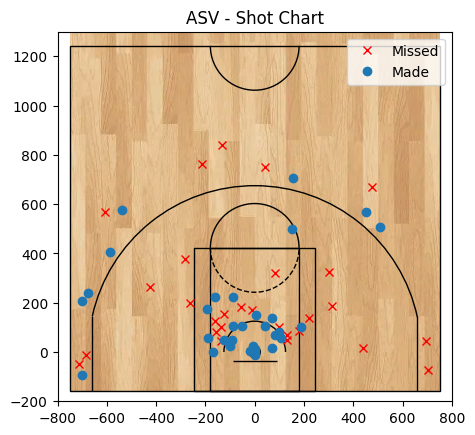

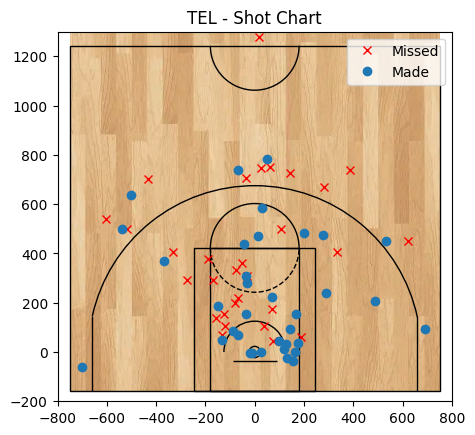

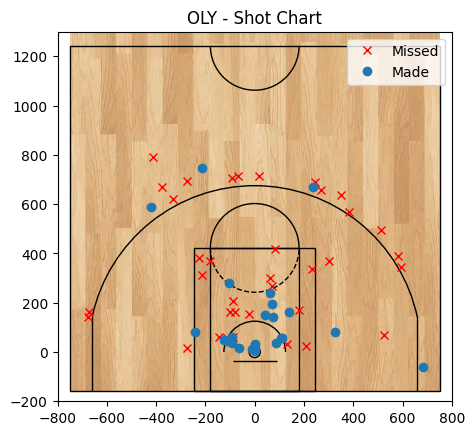

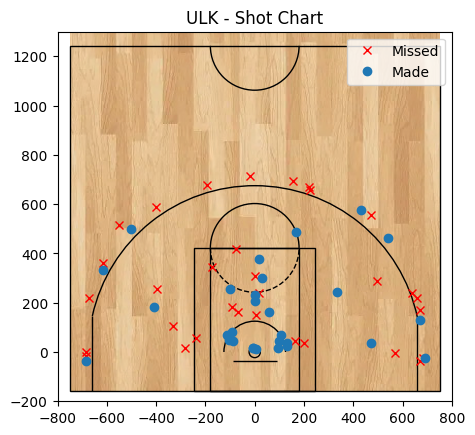

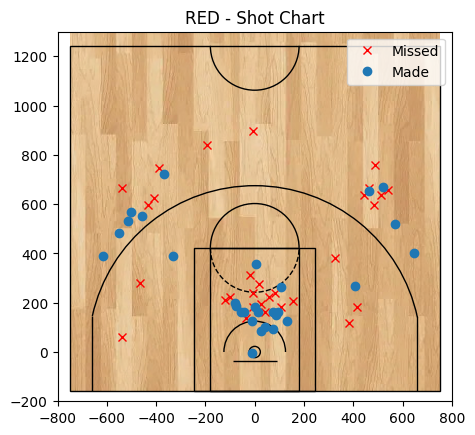

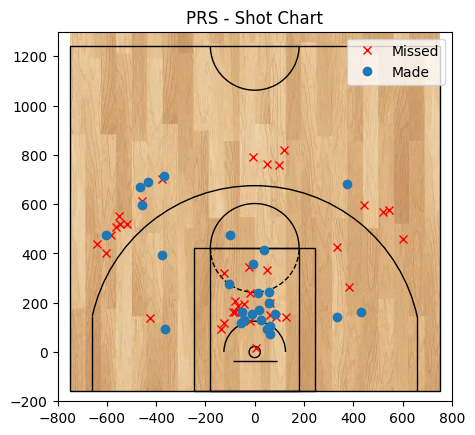

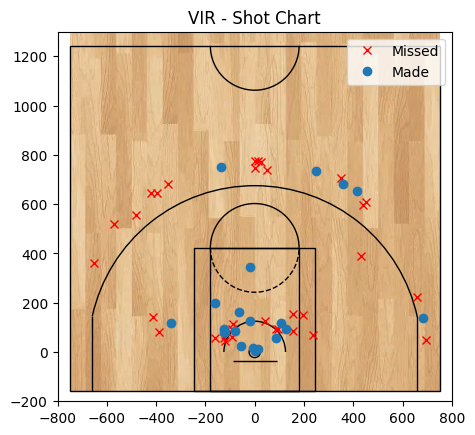

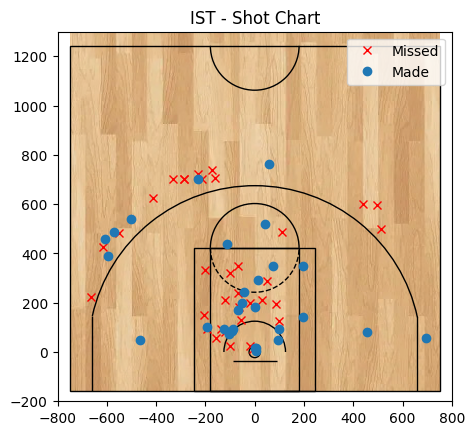

In [17]:
for team_abbr in shot_df["TEAM"].unique():
    team_shot_df = shot_df[(shot_df["TEAM"] == team_abbr) & (shot_df["Round"] == round_)]
    team_missed_mask = team_shot_df["ID_ACTION"].str.contains("FGA")
    team_made_mask = team_shot_df["ID_ACTION"].str.contains("FGM")
    plot_scatter(team_shot_df[team_made_mask], team_shot_df[team_missed_mask], title=f'{team_abbr} - Shot Chart', color="red")